# Encontrar las raices de una función

Existen dos métodos: de bipartición y de Newton.

### Método de Bipartición

Toma como ptos iniciales a dos valores de de $x_0,x_1$ tales que:
$$
f(x_0)>0 \ \ \ \ \ \ \ f(x_1)<0
$$

Posteriormente se toma el punto medio entre $x_0,x_1$:
$$
x_2=\frac{x_0+x_1}{2}
$$

Se evalua $x_2$ en la función y se analiza si:
$$
f(x_2)>0 \ \ \ o \ \ \ \ f(x_2)<0
$$

Dependiendo del resultado, se elige como nuevo intervalo $[x_0,x_2]$ o $[x_2,x_1]$.

El paso se repite hasta que:

$$
|x_i-x_j|<\epsilon \ \ \ y \ \ \  |f(x_i)-f(x_j)|<\epsilon
$$

donde episilon es un número que el usuario eligió dependiendo de lo que necesita.

NOTA: éste algoritmo sólo sirve si la función cruza el eje, si son funciones pares como $x^2$, $x^4$, ... el algoritmo no funciona.

In [1]:
from pylab import*
%matplotlib inline

In [2]:
def biparticion(f,x_i,x_d,err=1e-5):
    raiz=0.5*(x_i+x_d)
    y_i,y_d=f(x_i),f(x_d)
    while abs(raiz-x_d) >=err and abs(y_i-y_d)>=err:
        y_m=f(raiz)
        if y_m == 0.:
            print "ya tenemos la raiz!"
            break
        if y_m*y_i < 0:
            x_d=raiz
        else:
            x_i=raiz
        raiz=0.5*(x_i+x_d)
        y_i,y_d=f(x_i),f(x_d)
    return raiz

In [3]:
def biparticion1(f,x_i,x_d,err=1e-5):
    raiz=0.5*(x_i+x_d)
    y_i,y_d=f(x_i),f(x_d)
    n=0
    while abs(raiz-x_d) >=err and abs(y_i-y_d)>=err:
        y_m=f(raiz)
        if y_m == 0.:
            print "ya tenemos la raiz!"
            break
        if y_m*y_i < 0:
            x_d=raiz
        else:
            x_i=raiz
        raiz=0.5*(x_i+x_d)
        y_i,y_d=f(x_i),f(x_d)
        n += 1
    return raiz

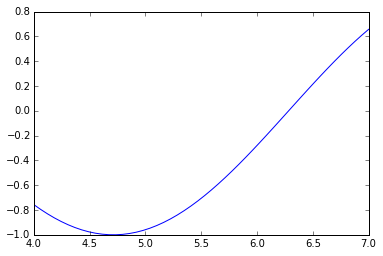

In [4]:
x=linspace(4,7)
plot(x,sin(x))
show()

In [5]:
print "La raiz es: ", biparticion(sin,5,7)
print "Notemos que el valor de 2pi es: ",2*pi
print "Así que el error es: ", 2*pi-biparticion(sin,5,7)

La raiz es:  6.28318023682
Notemos que el valor de 2pi es:  6.28318530718
Así que el error es:  5.07036317998e-06


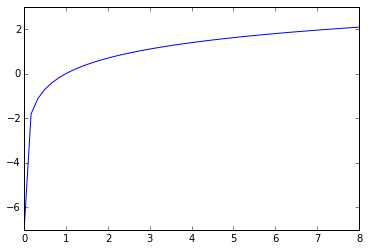

In [6]:
x=linspace(0.001,8)
plot(x,log(x))
show()

In [7]:
biparticion(log,0.001,8)

0.9999977293014525

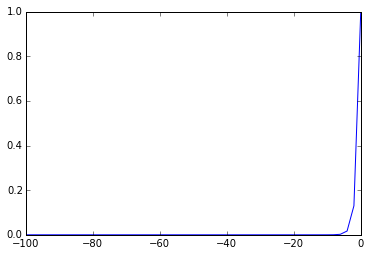

In [8]:
x=linspace(-100,0)
plot(x,exp(x))
show()

In [9]:
biparticion(exp(x),-10,0)
#como no hay x tal que exp(x)<0, el programa no puede dar un resultado :(

TypeError: 'numpy.ndarray' object is not callable

### Método de Newton

Se basa en la idea de que podemos aproximar la raiz de una función mediante las derivadas de la misma. Lo que se hace es obtener una recta tangente a la función evaluada en el punto inicial y que tiene como pendiente la derivada de la función evaluada en dicho punto. El segundo paso el ver la intersección de la recta tangente

$$
x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)} \ \ \ \ \ \ \ \ \ \ \ \ f'(x_n) \neq 0 
$$

NOTA: Si la derivada de la función es cero, entonces el método va a diverger!

NOTA: Hay que ser cuidadoso con éste método cuando la función tiene varias raices.

In [10]:
def newton(fun,d_fun,x_i,err=1e-300):
    while abs(fun(x_i)) >= err:
        raiz=x_i-fun(x_i)/d_fun(x_i)
        x_i = raiz
    return raiz

In [11]:
def f1(x):
    return -exp(x)
def d_f1(x):
    return -exp(x)

In [12]:
newton(f1,d_f1,5)
#ahora si podemos dar un valor para la raiz de la exponencial :)

-691.0

Si queremos que se cuenten los pasos para llegar al resultado

In [13]:
def newton1(fun,d_fun,x_i,err=1e-10):
    n=0
    while abs(fun(x_i)) >= err:
        print n, "\t", x_i
        raiz=x_i-fun(x_i)/d_fun(x_i)
        x_i = raiz
        n += 1
    return raiz

In [14]:
newton1(f1,d_f1,5)

0 	5
1 	4.0
2 	3.0
3 	2.0
4 	1.0
5 	0.0
6 	-1.0
7 	-2.0
8 	-3.0
9 	-4.0
10 	-5.0
11 	-6.0
12 	-7.0
13 	-8.0
14 	-9.0
15 	-10.0
16 	-11.0
17 	-12.0
18 	-13.0
19 	-14.0
20 	-15.0
21 	-16.0
22 	-17.0
23 	-18.0
24 	-19.0
25 	-20.0
26 	-21.0
27 	-22.0
28 	-23.0


-24.0

In [15]:
def f2(x):
    return x**4
def d_f2(x):
    return 4*x**3

In [16]:
newton1(f2,d_f2,-200)

0 	-200
1 	-150
2 	-112
3 	-84
4 	-63
5 	-47
6 	-35
7 	-26
8 	-19
9 	-14
10 	-10
11 	-7
12 	-5
13 	-3
14 	-2
15 	-1


0

### Comparando métodos

In [17]:
def fea(x):
    return x**2 + tan(sqrt(-8*x + pi))**3
def d_fea(x):
    return 2*x - 12*(tan(sqrt(-8*x + pi))**2 + 1)*tan(sqrt(-8*x + pi))**2/sqrt(-8*x + pi)

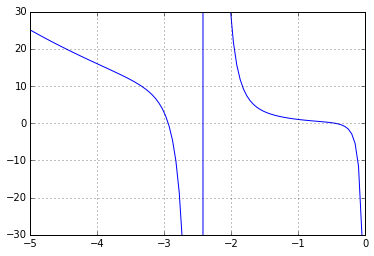

In [18]:
x=linspace(-5,0,100)
ylim([-30,30])
plot(x,fea(x))
grid(True)
show()

In [19]:
newton1(fea, d_fea, -4)

0 	-4
1 	-2.08230265647
2 	-1.98223724368
3 	-1.84419531028
4 	-1.64410621601
5 	-1.33678988885
6 	-0.890969748627
7 	-0.449053221684
8 	-0.456323592672
9 	-0.456490317248


-0.45649040060028229

In [20]:
biparticion1(fea,-4,-2)

-2.9426803588867188

NOTA: usando el mismo valor inicial, los métodos dan distintas raices, ésto es porque el método de newton está obteniendo las tangentes, y el punto de intesección de la tangente y la función está más cerca de otra raiz que de la que obtiene el método de bipartición.

### Newton a segundo orden 

In [22]:
def newton2(fun, x_i, err=1e-10):
    n=0
    while abs(fun(x_i)) >= err:
        print n, '\t', x_i
        raiz = x_i - fun(x_i)/num_dev(fun,x_i)
        x_i= raiz
        n += 1
    return raiz

NOTA: para usar los métodos de newton necesitamos utilizar derivadas, y a mi no me gusta calcular derivadas, entonces podemos hacer un programita que las haga por si mismo :) :) :)

In [29]:
def num_dev(f,x,h=1e-4):
    return (f(x+h)-f(x-h))/(2*h)

In [34]:
num_dev(sin, pi/2)

0.0

Para dar más presición al método de newton tengo que usar una mejor definición para mi derivada, entonces usemos más términos para la serie de taylor de la función:

$$
f(x_0+-h)=f(x_0)+-f'(x_0)h+\frac{f''(x_0)h^2}{2!}+-\frac{f'''(x_0)h^3}{3!}+\frac{f''''(x_0)h^4}{4!}
$$
$$
f(x_0+-2h)=f(x_0)+-2f'(x_0)h+\frac{2f''(x_0)h^2}{1}+-\frac{4f'''(x_0)h^3}{3}+\frac{2f''''(x_0)h^4}{3}
$$

Restando las anteriores funciones:

$$
f(x_0+h)-f(x_0-h)=2f'(x_0)h+\frac{f'''(x_0)h^3}{3}
$$
$$
f(x_0+2h)-f(x_0-2h)=4f'(x_0)h+\frac{8f'''(x_0)h^3}{3}
$$

Despejando:

$$
f'(x_0)=\frac{-f(x_0+2h)+8f(x_0+h)-8f(x_0-h)+f(x_0-2h)}{12h}
$$

Con ésta nueva descripción tenemos una mejor función :)

In [26]:
def num_dev_mejorado(f,x_0,h=1e-4):
    return (-f(x_0+2*h)+8*f(x_0+h)-8*f(x_0-h)+f(x_0-2*h))/(12*h)

In [33]:
print(cos(pi/4))
print(num_dev(sin,pi/4))
print(num_dev_mejorado(sin, pi/4))

0.707106781187
0.707106780007
0.707106781186
